In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set_palette("Paired")

In [3]:
data = pd.read_csv('../Data_prep/Louisville_Animal_Cleaned.csv')

C:\Users\jesse\AppData\Local\Temp\ipykernel_5876\2808902644.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data_prep/Louisville_Animal_Cleaned.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41974 entries, 0 to 41973
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kennel         41974 non-null  object 
 1   animalid       41974 non-null  object 
 2   jurisdiction   40177 non-null  object 
 3   intype         41974 non-null  object 
 4   insubtype      41918 non-null  object 
 5   surreason      40177 non-null  object 
 6   outtype        41974 non-null  object 
 7   outsubtype     32056 non-null  object 
 8   animaltype     41974 non-null  object 
 9   sex            41829 non-null  object 
 10  bites          40177 non-null  object 
 11  petsize        41572 non-null  object 
 12  color          41972 non-null  object 
 13  sourcezipcode  41696 non-null  object 
 14  ObjectId       41974 non-null  int64  
 15  Mixed          41974 non-null  bool   
 16  days_in        41965 non-null  float64
 17  in_season      41974 non-null  object 
 18  out_se

In [5]:
data.head()

,kennel,animalid,jurisdiction,intype,insubtype,surreason,outtype,outsubtype,animaltype,sex,...,petsize,color,sourcezipcode,ObjectId,Mixed,days_in,in_season,out_season,breed,mixed_breed
0,FOLLOWUP,A713651,40202,STRAY,OTC,STRAY,RTO,IN KENNEL,DOG,F,...,MED,TAN / BLACK,40208,1,True,3.0,SPRING,SPRING,ENG BULLDOG,UNKNOWN
1,N46,A713652,40208,STRAY,OTC,STRAY,ADOPTION,WALK IN,CAT,N,...,LARGE,ORG TABBY,40208,2,False,5.0,SPRING,SPRING,DOMESTIC SH,NaN
2,N17,A733898,40208,STRAY,OTC,STRAY,FOSTER,VACATION,DOG,S,...,MED,CHOCOLATE / WHITE,40208,3,False,26.0,SPRING,SPRING,PIT BULL,NaN
3,N30,A712650,40222,STRAY,OTC,STRAY,ADOPTION,INTERNET,DOG,N,...,PUPPY,TAN,40208,4,True,13.0,SPRING,SPRING,PIT BULL,UNKNOWN
4,409,A743389,40216,STRAY,OTC,STRAY,EUTH,BEHAV HIST,DOG,M,...,MED,BL BRINDLE,40216,5,False,9.0,SUMMER,SUMMER,PIT BULL,NaN


In [6]:
data.tail()

,kennel,animalid,jurisdiction,intype,insubtype,surreason,outtype,outsubtype,animaltype,sex,...,petsize,color,sourcezipcode,ObjectId,Mixed,days_in,in_season,out_season,breed,mixed_breed
41969,N18,A671399,40219,STRAY,OTC,STRAY,ADOPTION,INTERNET,DOG,N,...,LARGE,BLACK / BROWN,40202.0,52602,True,7.0,FALL,FALL,LABRADOR RETR,UNKNOWN
41970,306,A676059,40211,STRAY,FIELD,STRAY,TRANSFER,KHS,DOG,M,...,MED,BROWN,40202.0,52603,False,9.0,WINTER,WINTER,PIT BULL,NaN
41971,NP,A676364,40215,CONFISCATE,NEGLECT,VIOLATION,ADOPTION,EVENT,DOG,S,...,MED,BLACK / WHITE,40202.0,52604,True,24.0,WINTER,WINTER,BORDER COLLIE,UNKNOWN
41972,Q15,A601911,40216,CONFISCATE,NEGLECT,CRUELTY,RTO,IN KENNEL,DOG,M,...,MED,BLUE,40202.0,52605,False,4.0,SUMMER,SUMMER,PIT BULL,NaN
41973,VET,A671364,40211,STRAY,OTC,STRAY,RTO,IN KENNEL,DOG,N,...,MED,BR BRINDLE,40202.0,52606,False,4.0,FALL,FALL,PIT BULL,NaN


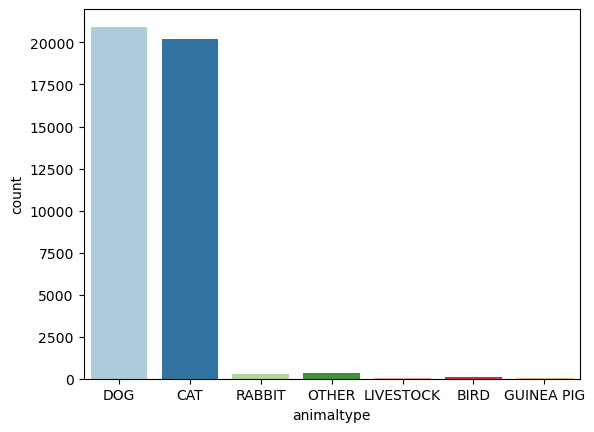

In [7]:
#create a bar chart of animaltypes
sns.countplot(x='animaltype', data=data)
plt.show()

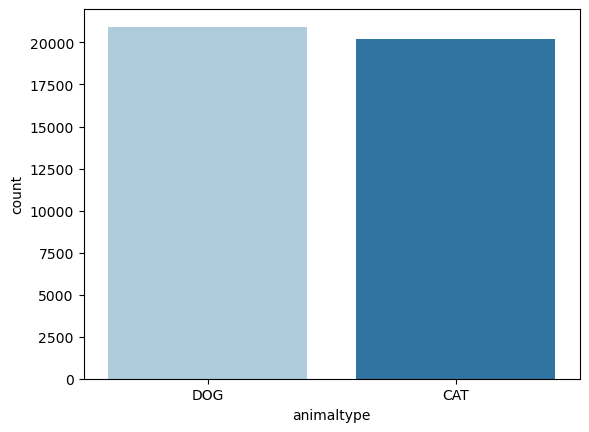

In [8]:
#drop all rows with animaltype != dog or cat
data_dc = data[data['animaltype'].isin(['DOG', 'CAT'])]
sns.countplot(x='animaltype', data=data_dc)
plt.show()

<Axes: xlabel='outtype'>

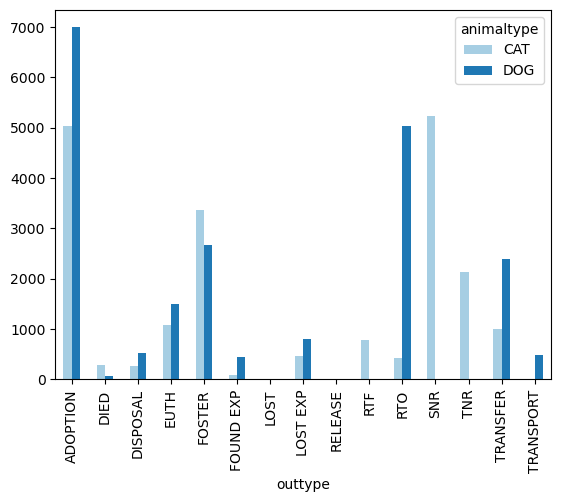

In [9]:
type_outs_tab = pd.crosstab(data_dc['outtype'],data_dc['animaltype'])
type_outs_tab.plot(kind='bar', stacked=False)

<Axes: xlabel='outtype'>

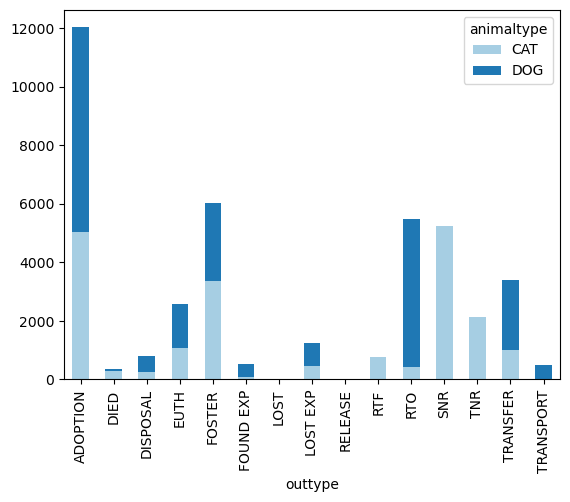

In [10]:
type_outs_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='outtype'>

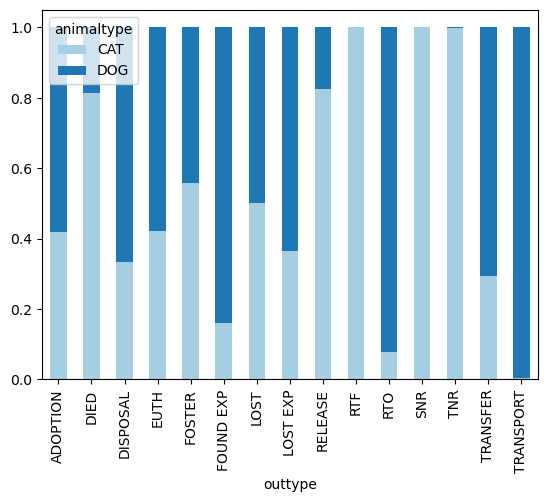

In [11]:
type_outs_tab_norm = type_outs_tab.div(type_outs_tab.sum(1), axis = 0)
type_outs_tab_norm.plot(kind='bar',stacked = True)

<Axes: xlabel='animaltype'>

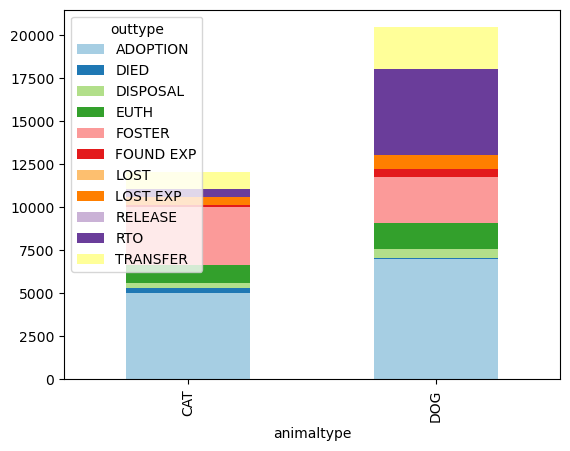

In [12]:
#create a crosstab of animaltype and outtype but exclude SNR, TNR, TRANSPORT, and RTF
type_outs_tab = pd.crosstab(data_dc['animaltype'],data_dc['outtype'])
type_outs_tab = type_outs_tab.drop(['SNR', 'TNR', 'TRANSPORT', 'RTF'], axis=1)
type_outs_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='animaltype'>

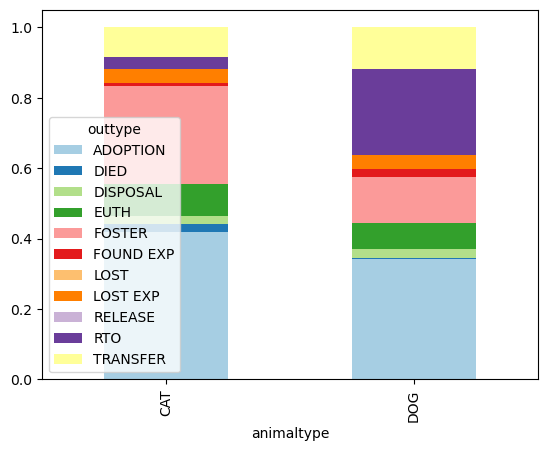

In [13]:
type_outs_tab_norm = type_outs_tab.div(type_outs_tab.sum(1), axis = 0)
type_outs_tab_norm.plot(kind='bar',stacked = True)

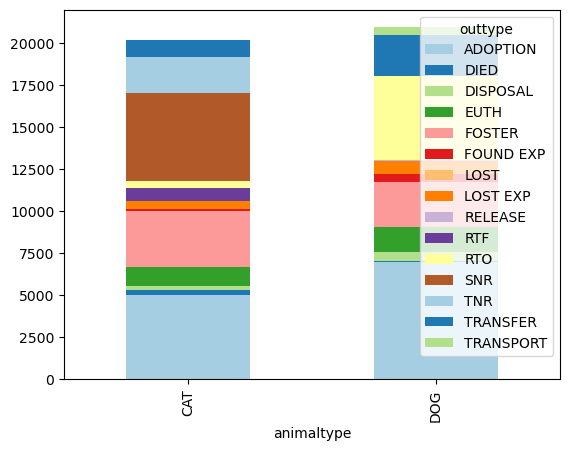

In [14]:
type_out_cross = pd.crosstab(data_dc['animaltype'], data_dc['outtype'])
type_out_cross.plot(kind='bar', stacked=True)
plt.show()

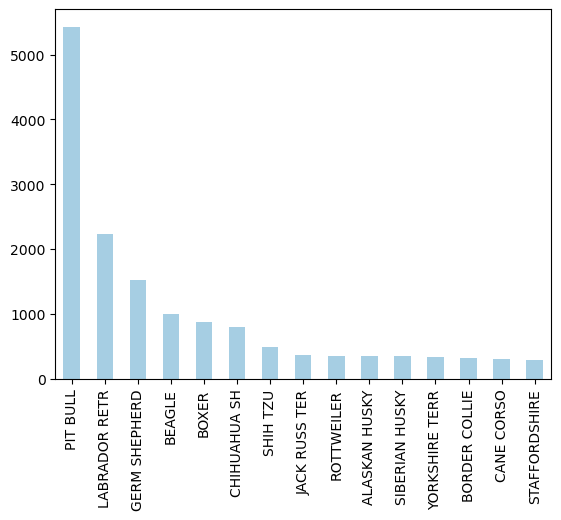

In [15]:
#create a bar chart of the top 15 breeds for dog animaltype
dog_breed = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed = dog_breed['breed'].value_counts().head(15)
dog_breed.plot(kind='bar')
plt.show()

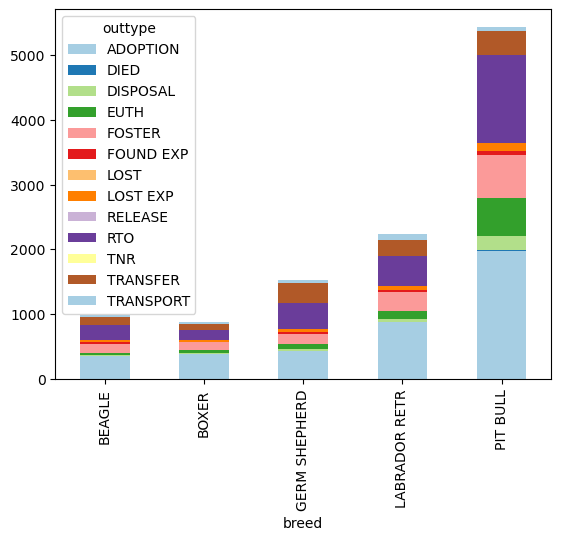

In [16]:
#for the top 5 breeds, create a stacked depiction of outtype euth, adoption, and return to owner. other than those 3, make it one bucket of other
dog_breed = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed = dog_breed['breed'].value_counts().head(5)
dog_breed = dog_breed.index.tolist()
dog_breed = data_dc[data_dc['breed'].isin(dog_breed)]
dog_breed_tab = pd.crosstab(dog_breed['breed'], dog_breed['outtype'])
dog_breed_tab.plot(kind='bar', stacked=True)
plt.show()


make the colors not repeat and also move the map to the bottom

<Axes: xlabel='breed'>

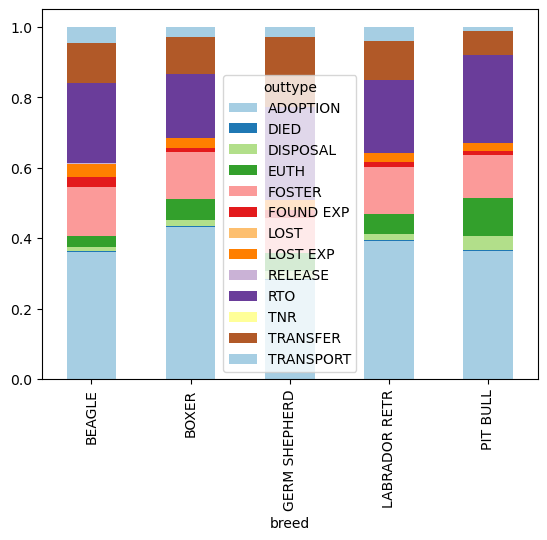

In [17]:
#normalize the above chart
dog_breed_tab_norm = dog_breed_tab.div(dog_breed_tab.sum(1), axis = 0)
dog_breed_tab_norm.plot(kind='bar',stacked = True)

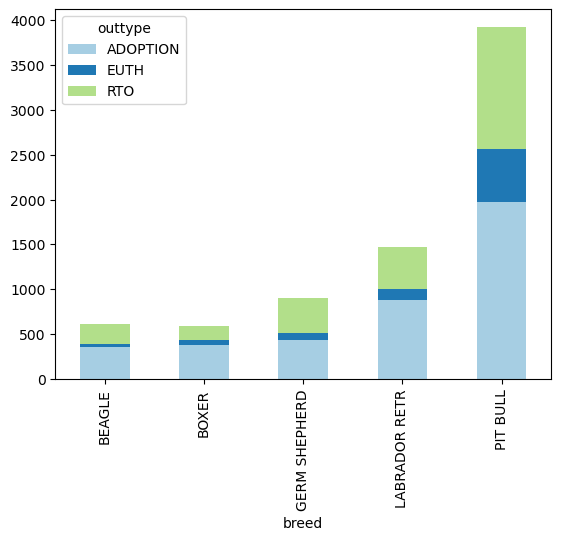

In [18]:
#for the above chart, only show adoption, euth, and rto. other than those 3, make it one bucket of other
dog_breed2 = data_dc[data_dc['animaltype'] == 'DOG']
dog_breed2 = dog_breed2['breed'].value_counts().head(5)
dog_breed2 = dog_breed2.index.tolist()
dog_breed2 = data_dc[data_dc['breed'].isin(dog_breed2)]
dog_breed_tab2 = pd.crosstab(dog_breed2['breed'], dog_breed2['outtype'])
dog_breed_tab2 = dog_breed_tab2[['ADOPTION', 'EUTH', 'RTO']]
dog_breed_tab2.plot(kind='bar', stacked=True)
plt.show()


<Axes: xlabel='breed'>

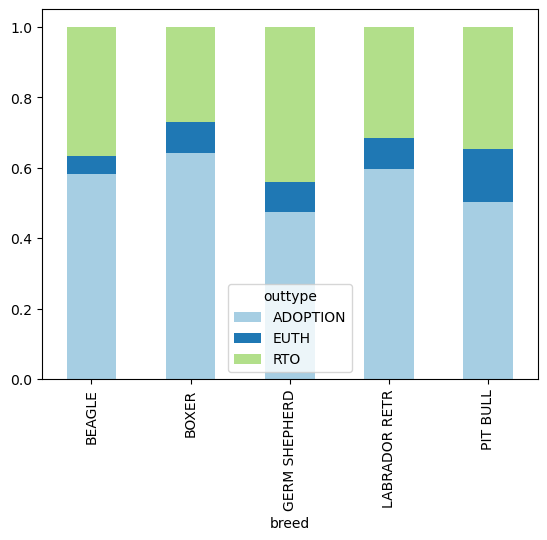

In [19]:
#normalize the above chart
dog_breed_tab_norm2 = dog_breed_tab2.div(dog_breed_tab2.sum(1), axis = 0)
dog_breed_tab_norm2.plot(kind='bar',stacked = True)


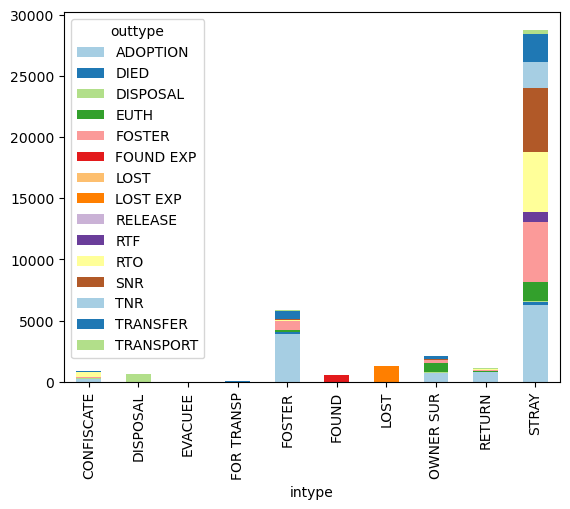

In [20]:
#compare intype with outtype
intype_outtype = pd.crosstab(data_dc['intype'], data_dc['outtype'])
intype_outtype.plot(kind='bar', stacked=True)
plt.show()


<Axes: xlabel='intype'>

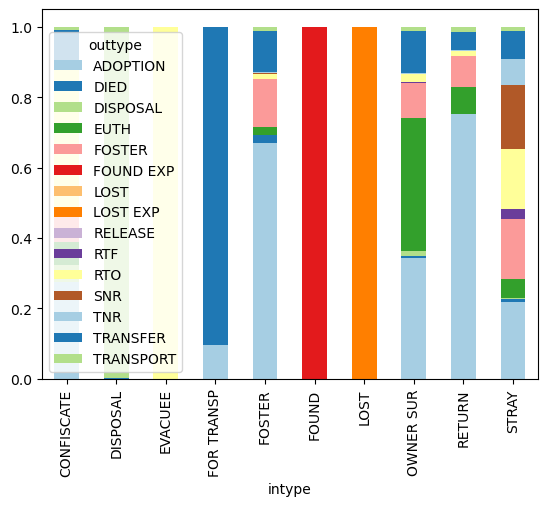

In [21]:
intype_outtype_norm = intype_outtype.div(intype_outtype.sum(1), axis = 0)
intype_outtype_norm.plot(kind='bar',stacked = True)